# ML Major Project May-June Batch 1
## By- Adwait Agashe

### **Importing Libraries**

In [333]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error 
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import category_encoders as ce
from itertools import combinations


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

%matplotlib inline

### **Reading Data**

In [334]:
data = pd.read_excel('Data_Train (1).xlsx')
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


 ### **Getting Information from Data**

In [335]:
data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [336]:
data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [337]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [338]:
data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [339]:
data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

### **Removing the Units and converting to float dtype**

In [340]:
data['Mileage'] = data['Mileage'].apply(lambda x: re.sub('[$kmpl|km/kg]','',str(x)))
data['Engine'] = data['Engine'].apply(lambda x: re.sub('[$CC]','',str(x)))
data['Power'] = data['Power'].apply(lambda x: re.sub('[$bhp]','',str(x)))

data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


In [341]:
data['Mileage'] = pd.to_numeric(data['Mileage'],errors='coerce')
data['Engine'] = pd.to_numeric(data['Engine'],errors='coerce')
data['Power'] = pd.to_numeric(data['Power'],errors='coerce')
data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

### Exploratory Data Analysis

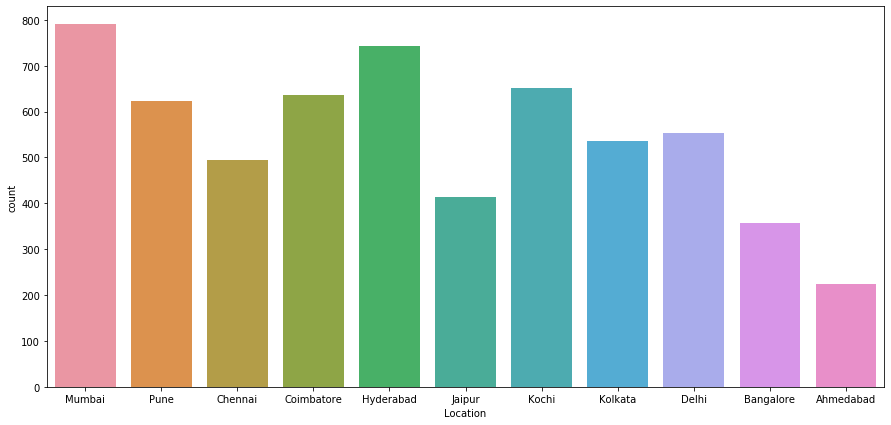

In [342]:
plt.figure(figsize=(15,7))
sns.countplot(data['Location'])
plt.show()

Data has maximum number of cars from Mumbai.

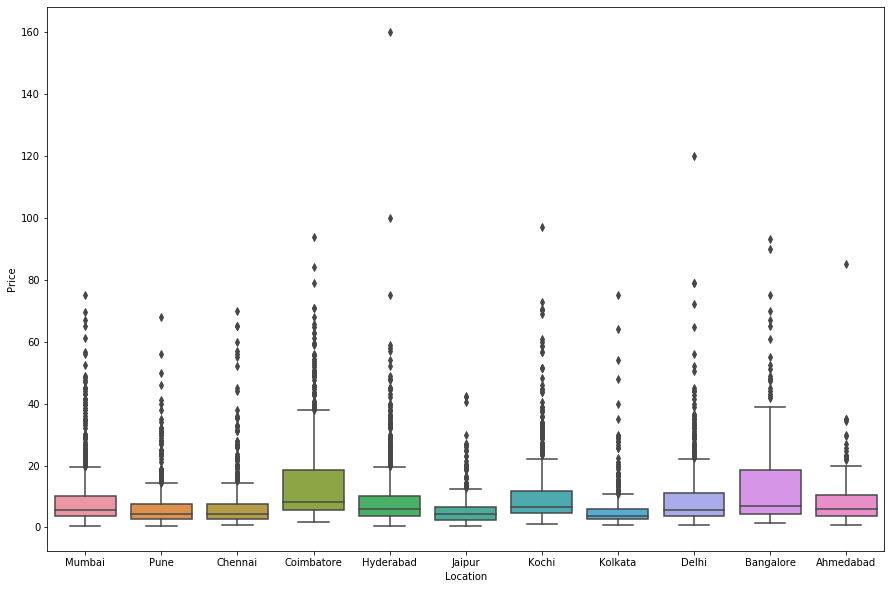

In [343]:
plt.figure(figsize=(15,10))
sns.boxplot(data['Location'],data['Price'])
plt.show()

Cars from Coimbatore have higher price and variation in average

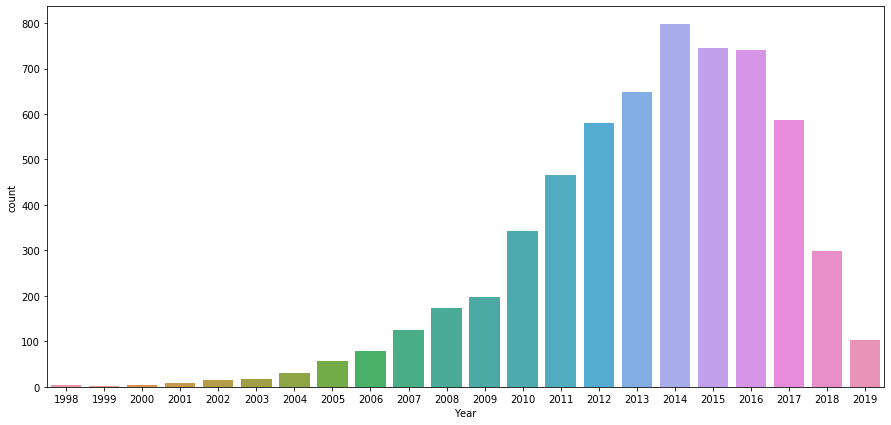

In [344]:
plt.figure(figsize=(15,7))
sns.countplot(data['Year'])
plt.show()

Most of the cars present are from 2011 onwards

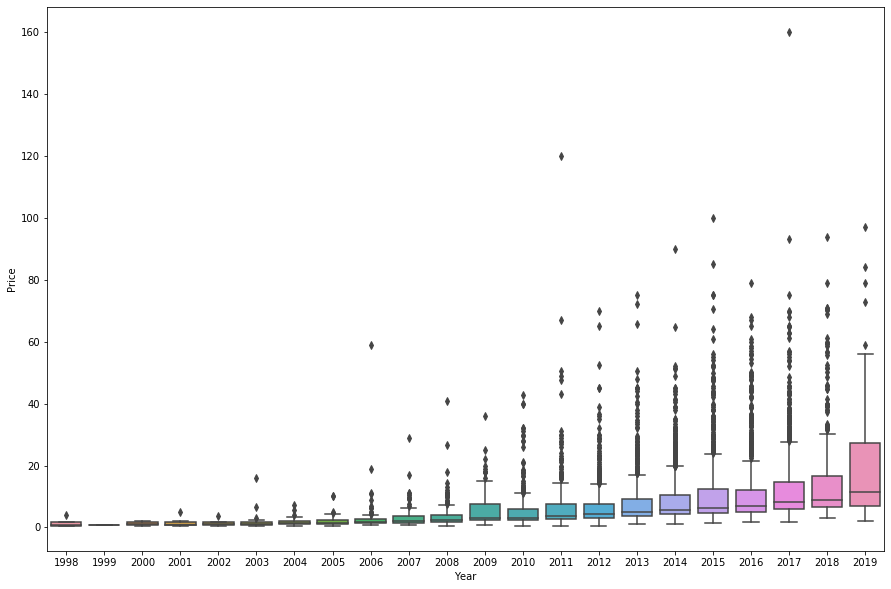

In [345]:
plt.figure(figsize=(15,10))
sns.boxplot(data['Year'],data['Price'])
plt.show()

Newer cars are sold at higher average price

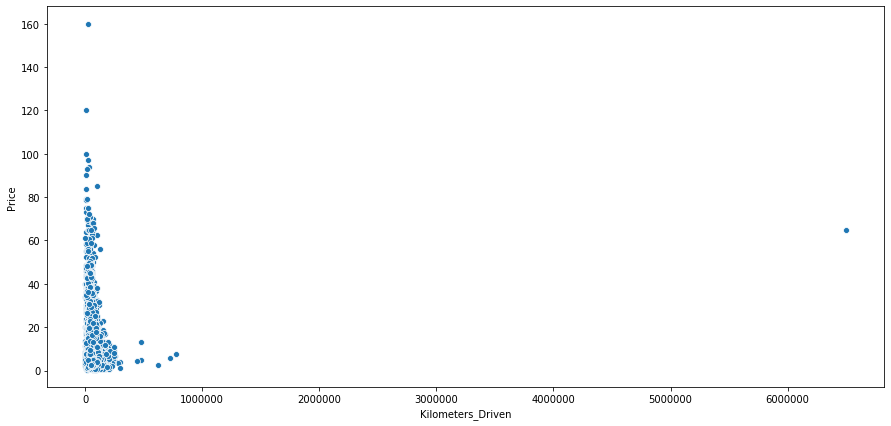

In [347]:
plt.figure(figsize=(15,7))
sns.scatterplot(data['Kilometers_Driven'],data['Price'])
plt.show()

Data contains an outlayer at more than 6000000. Removing the outlayer

In [348]:
data.drop(data[data['Kilometers_Driven'] >= 6500000].index, axis=0, inplace=True)

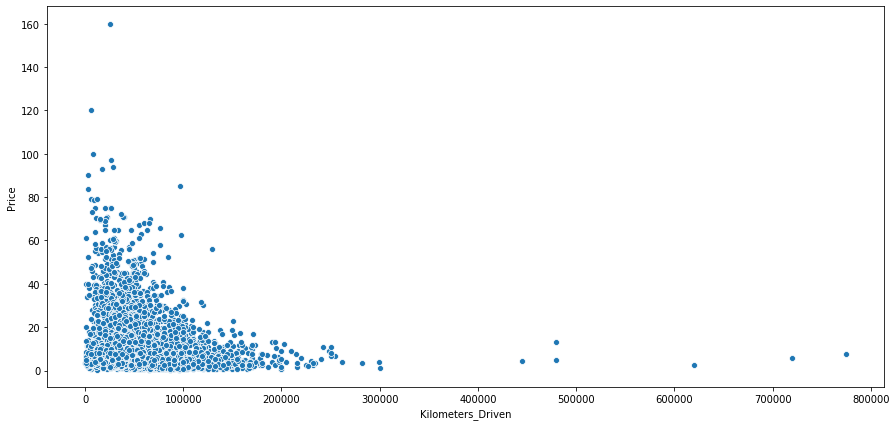

In [349]:
plt.figure(figsize=(15,7))
sns.scatterplot(data['Kilometers_Driven'],data['Price'])
plt.show()

A large number of cars have less than 200000 km driven.


Cars with lower KM Driven are sold at higher price normally.

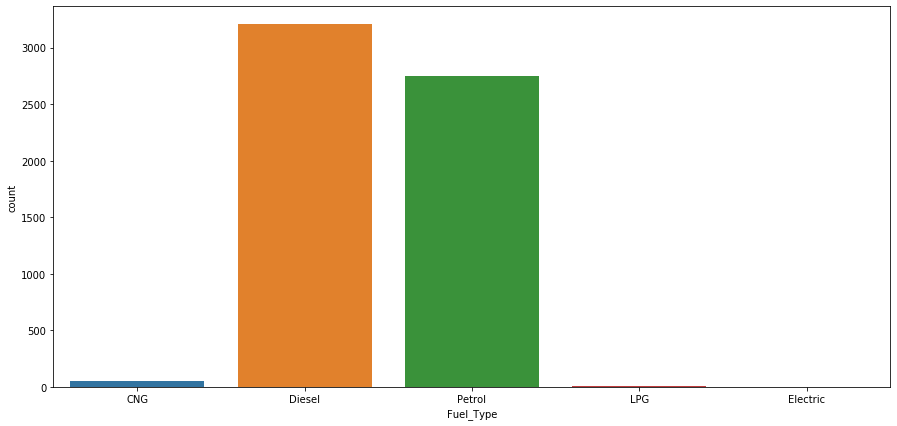

In [350]:
plt.figure(figsize=(15,7))
sns.countplot(data['Fuel_Type'])
plt.show()

Most of the cars are Deisel or Petrol 

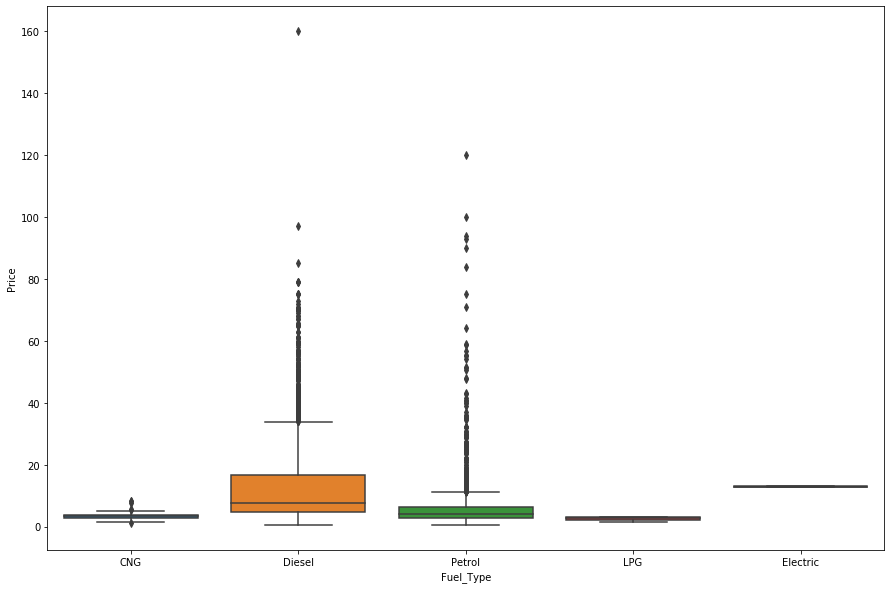

In [351]:
plt.figure(figsize=(15,10))
sns.boxplot(data['Fuel_Type'],data['Price'])
plt.show()

Electric cars are sold on higher average even though they are less

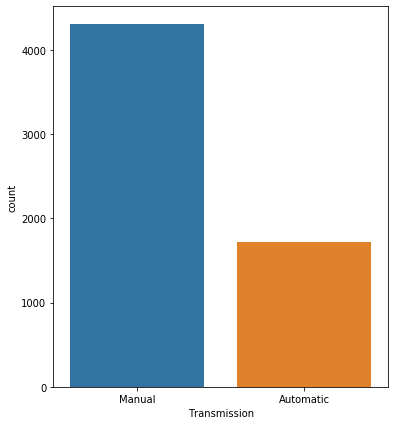

In [352]:
plt.figure(figsize=(6,7))
sns.countplot(data['Transmission'])
plt.show()

Most of the cars are Manual in transmission

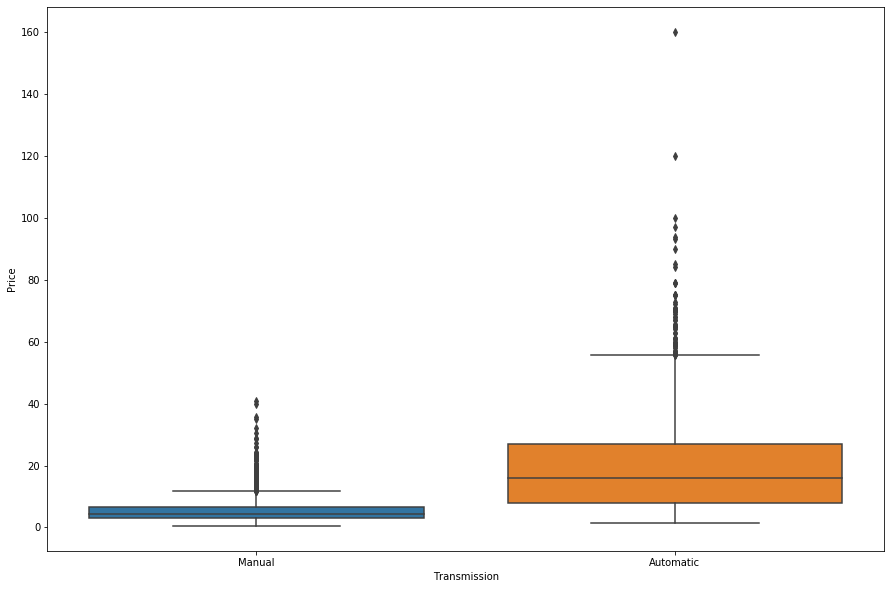

In [353]:
plt.figure(figsize=(15,10))
sns.boxplot(data['Transmission'],data['Price'])
plt.show()

Automatic cars have higher price

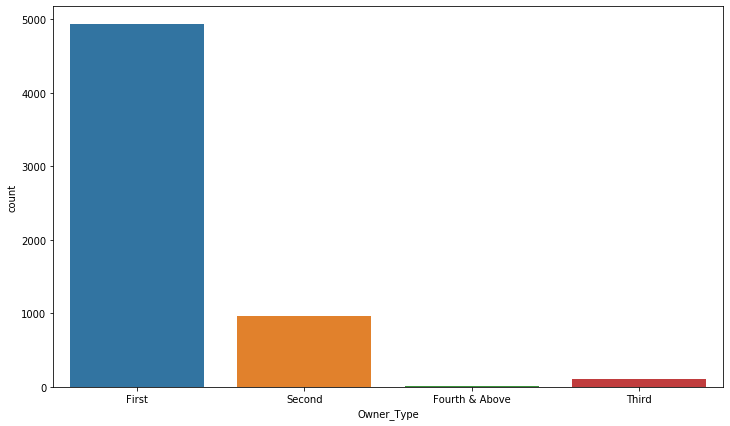

In [354]:
plt.figure(figsize=(12,7))
sns.countplot(data['Owner_Type'])
plt.show()

Majority of cars have First owner.

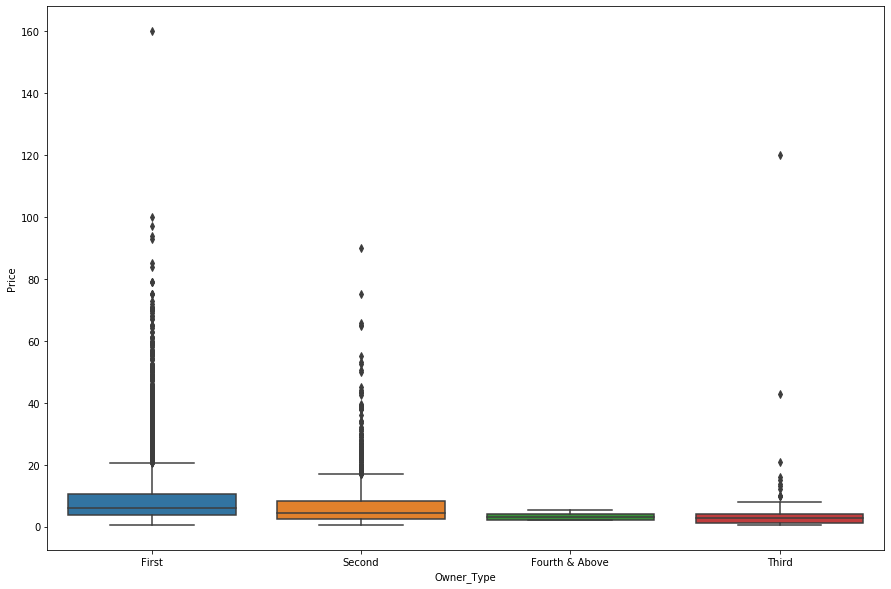

In [355]:
plt.figure(figsize=(15,10))
sns.boxplot(data['Owner_Type'],data['Price'])
plt.show()

Relation between owner type and price is as expected

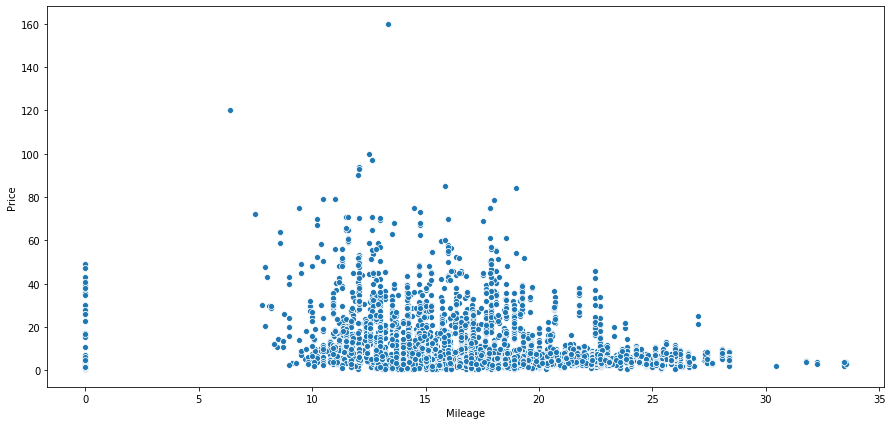

In [356]:
plt.figure(figsize=(15,7))
sns.scatterplot(data['Mileage'],data['Price'])
plt.show()

There are cars with 0 milege which is not possible. Converting it to nan.

In [357]:
data.loc[data['Mileage']==0,'Mileage']=np.nan

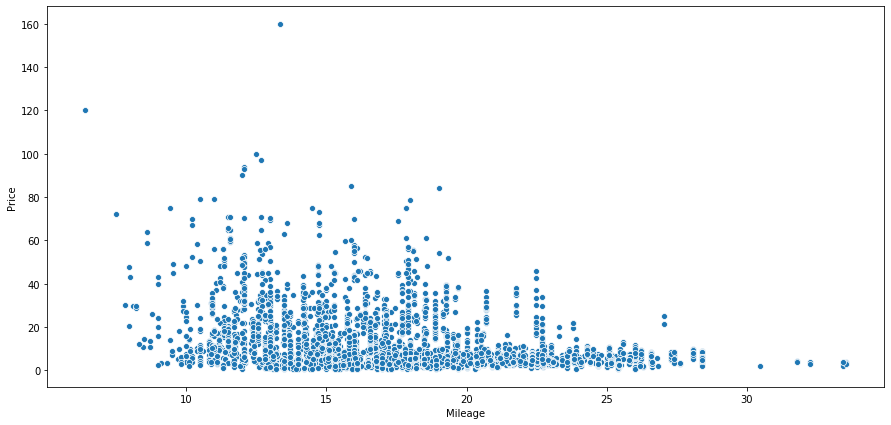

In [358]:
plt.figure(figsize=(15,7))
sns.scatterplot(data['Mileage'],data['Price'])
plt.show()

Mileage of majority cars is between 10 and 25.

Cars with higher mileage are not necessarily sold at higher price and distribution w.r.t mileage is pretty random.

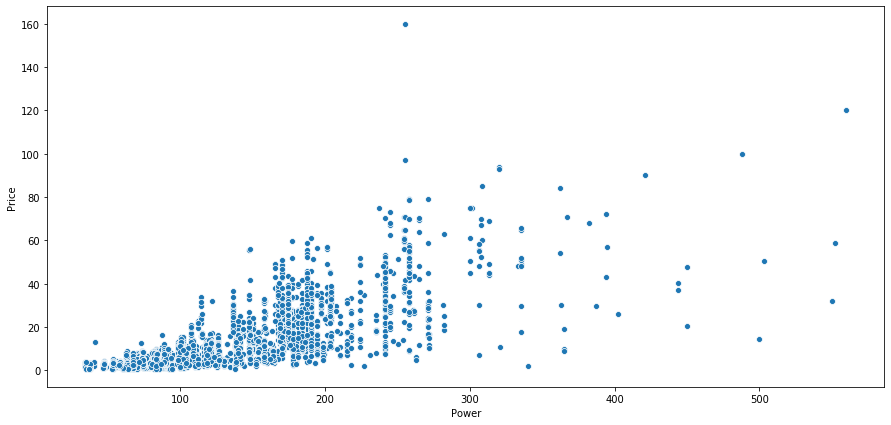

In [359]:
plt.figure(figsize=(15,7))
sns.scatterplot(data['Power'],data['Price'])
plt.show()

Power and Price have well defined relation with higher power getting sold at more price

Data has some inputs where power is null. Making it nan.

In [360]:
data.loc[data.Power == 'null','Power'] = np.NaN

/home/percy/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


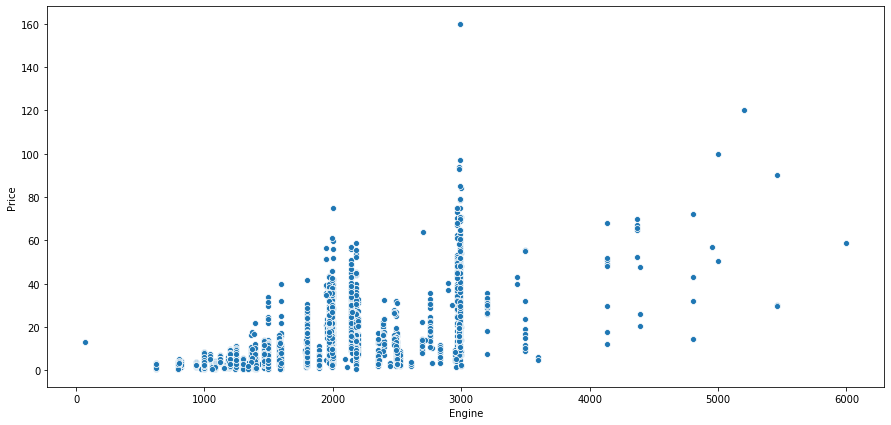

In [361]:
plt.figure(figsize=(15,7))
sns.scatterplot(data['Engine'],data['Price'])
plt.show()

Distribution of engine with price is pretty well defined

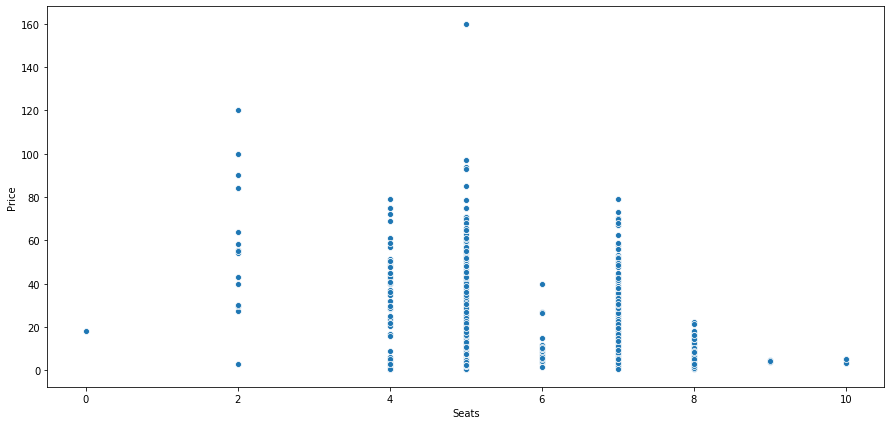

In [362]:
plt.figure(figsize=(15,7))
sns.scatterplot(data['Seats'],data['Price'])
plt.show()

One car has seats = 0. 

Setting it to nan

In [363]:
data.loc[data.Seats==0,"Seats"] = np.nan

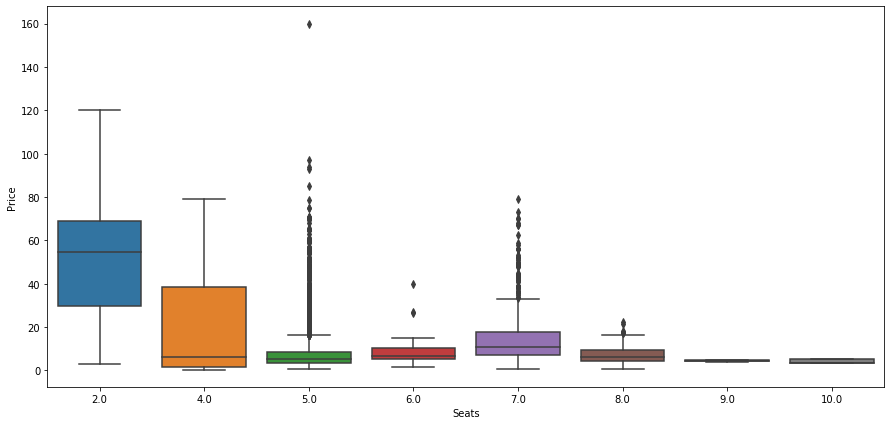

In [364]:
plt.figure(figsize=(15,7))
sns.boxplot(data['Seats'],data['Price'])
plt.show()

Cars with 2 seats are sold at a higher price on average.

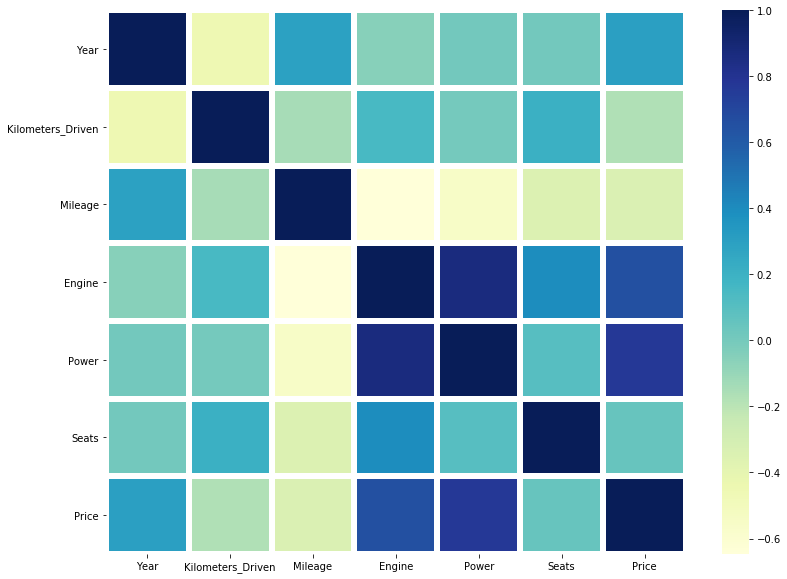

In [365]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(),cmap='YlGnBu',linewidth=5)
plt.show()

This shows correlation between the various numerical variables.

# Making New Features And Encoding Them

Removing Rover in land rover to get better results

In [366]:
data['Name'] = data['Name'].apply(lambda x: re.sub('Rover','',str(x)))

Splitting name into 3 columns

In [367]:
NameSplit = data.Name.str.split(expand=True)[[0,1,2]]
NameSplit.rename(columns={0:'Brand',1:'Model',2:'Type'}, inplace=True)
data = data.join(NameSplit)
data = data.drop("Name", axis=1)
data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Type
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon,R
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta,1.6
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz,V
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga,VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4,New


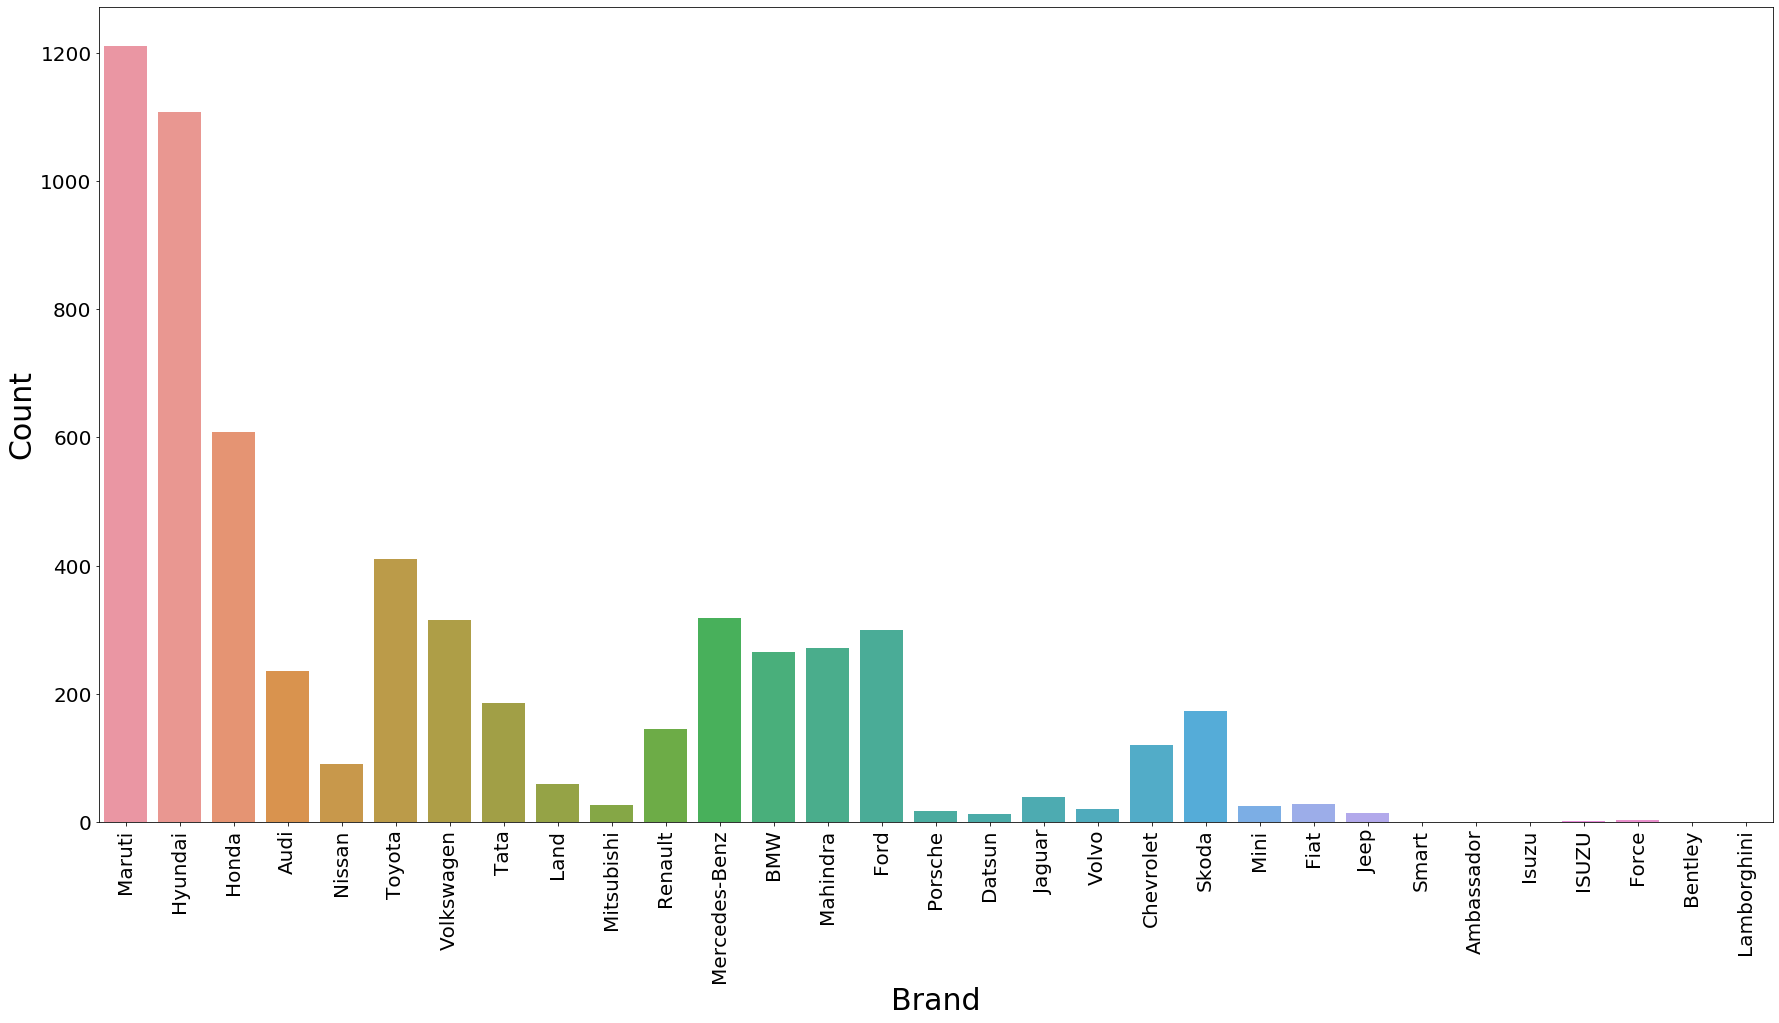

In [368]:
plt.figure(figsize=(30,15))
sns.countplot(data['Brand'])
plt.xticks(rotation=90,fontsize=20)
plt.yticks(rotation=0,fontsize=20)
plt.xlabel('Brand',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.show()

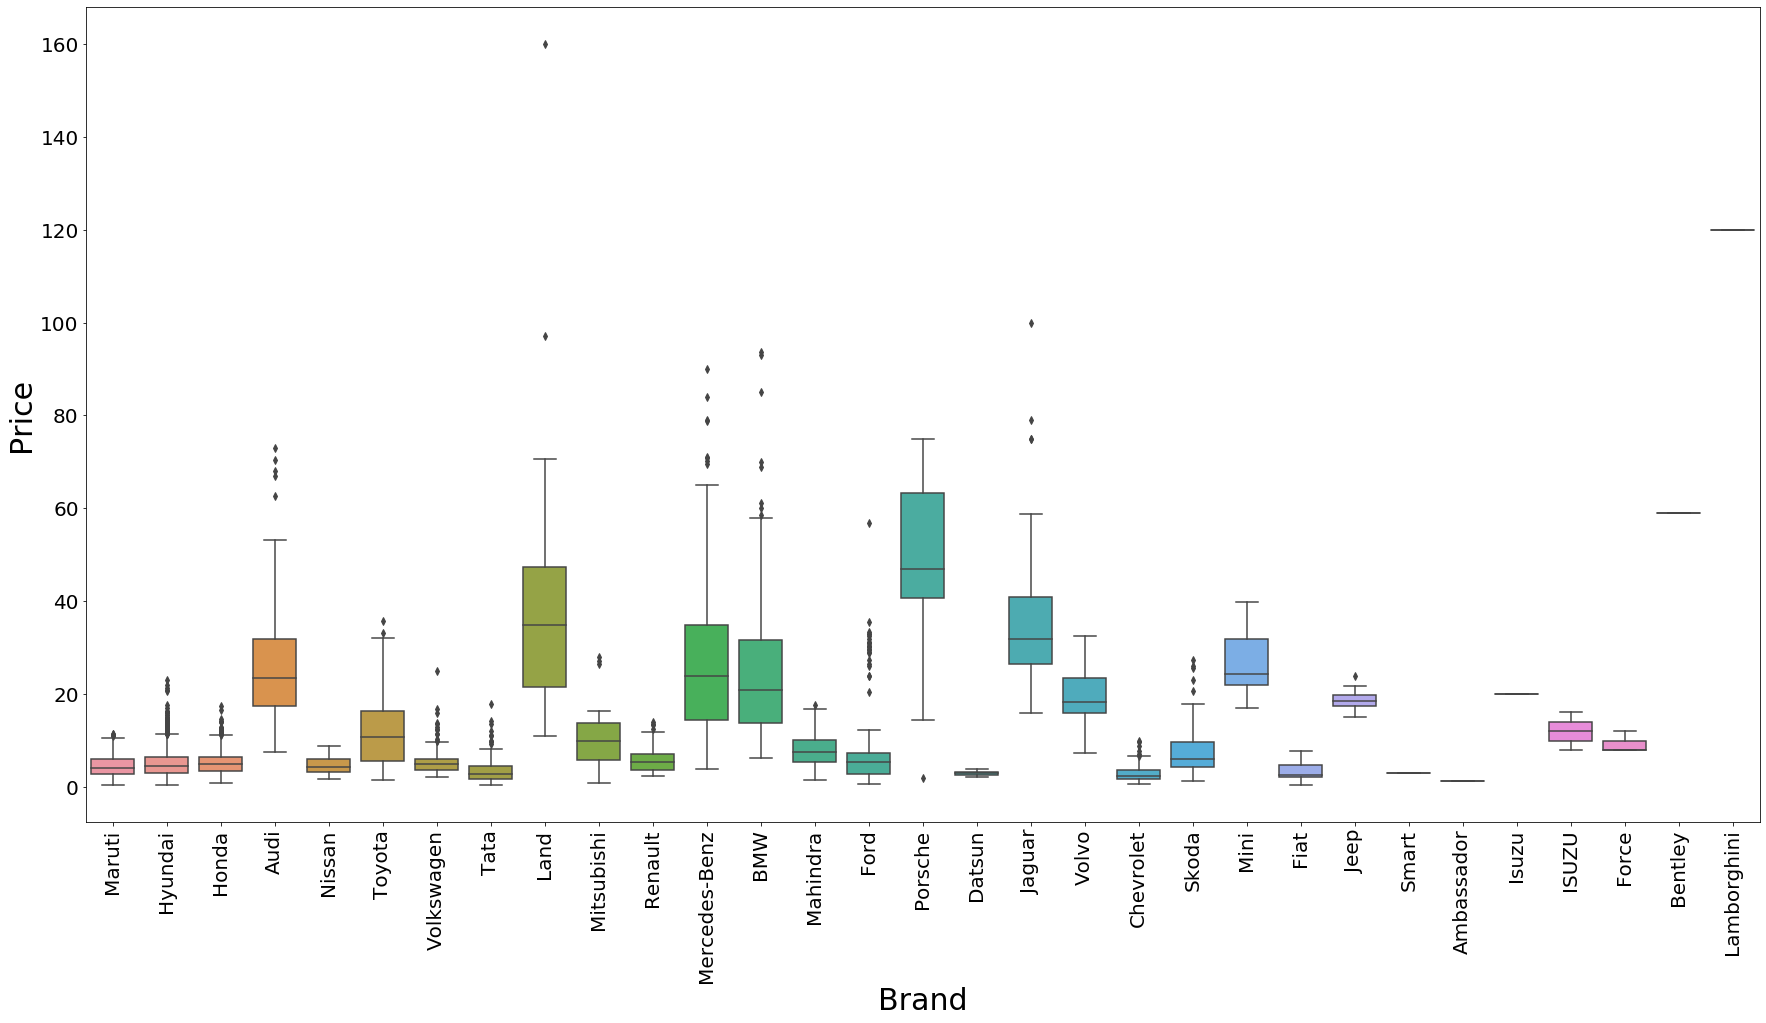

In [370]:
plt.figure(figsize=(30,15))
sns.boxplot(data['Brand'],data['Price'])
plt.xticks(rotation=90,fontsize=20)
plt.yticks(rotation=0,fontsize=20)
plt.xlabel('Brand',fontsize=30)
plt.ylabel('Price',fontsize=30)
plt.show()

Making new variables from the ones we already have to get better correlation

In [371]:
object_cols = data.select_dtypes("object").columns

low_cardinality_cols = [col for col in object_cols if data[col].nunique() < 15]
low_cardinality_cols.append("Brand")
low_cardinality_cols

['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand']

In [372]:
interactions = pd.DataFrame(index=data.index)

In [373]:
for features in combinations(low_cardinality_cols,2):
    
    new_interaction = data[features[0]].map(str)+"_"+data[features[1]].map(str)
    
    encoder = LabelEncoder()
    interactions["_".join(features)] = encoder.fit_transform(new_interaction)



data = data.join(interactions) 
data.head()
interactions

,Location_Fuel_Type,Location_Transmission,Location_Owner_Type,Location_Brand,Fuel_Type_Transmission,Fuel_Type_Owner_Type,Fuel_Type_Brand,Transmission_Owner_Type,Transmission_Brand,Owner_Type_Brand
0,26,19,28,217,0,0,1,4,38,16
1,32,21,32,236,2,3,12,4,33,9
2,8,5,6,48,6,10,43,4,32,8
3,6,5,6,53,2,3,19,4,38,16
4,9,6,12,64,1,5,5,2,0,32
...,...,...,...,...,...,...,...,...,...,...
6014,12,9,14,100,2,3,19,4,38,16
6015,18,13,19,143,2,3,12,4,33,9
6016,18,13,21,148,2,5,18,6,37,41
6017,25,17,26,195,6,10,50,4,38,16


# Splitting DataSet and Filling Null Values

In [374]:
features = data.drop(["Price"], axis=1)
price = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.25, random_state=0)

In [375]:
X_train.isnull().sum()

Location                     0
Year                         0
Kilometers_Driven            0
Fuel_Type                    0
Transmission                 0
Owner_Type                   0
Mileage                     55
Engine                      22
Power                      106
Seats                       28
Brand                        0
Model                        0
Type                         0
Location_Fuel_Type           0
Location_Transmission        0
Location_Owner_Type          0
Location_Brand               0
Fuel_Type_Transmission       0
Fuel_Type_Owner_Type         0
Fuel_Type_Brand              0
Transmission_Owner_Type      0
Transmission_Brand           0
Owner_Type_Brand             0
dtype: int64

Data has null values in 4 columns

In [376]:
number_cols = X_train.select_dtypes("number")
null_number_cols = number_cols.columns[number_cols.isnull().any()]

for cols in null_number_cols:
    X_train.loc[:,cols] = X_train.loc[:,cols].fillna(X_train.groupby('Brand')[cols].transform('median'))
    X_train.loc[:,cols] = X_train.loc[:,cols].fillna(X_train[cols].median())

    X_test.loc[:,cols] = X_test.loc[:,cols].fillna(X_test.groupby('Brand')[cols].transform('median'))
    X_test.loc[:,cols] = X_test.loc[:,cols].fillna(X_test[cols].median())

/home/percy/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [377]:
X_train.isnull().sum()

Location                   0
Year                       0
Kilometers_Driven          0
Fuel_Type                  0
Transmission               0
Owner_Type                 0
Mileage                    0
Engine                     0
Power                      0
Seats                      0
Brand                      0
Model                      0
Type                       0
Location_Fuel_Type         0
Location_Transmission      0
Location_Owner_Type        0
Location_Brand             0
Fuel_Type_Transmission     0
Fuel_Type_Owner_Type       0
Fuel_Type_Brand            0
Transmission_Owner_Type    0
Transmission_Brand         0
Owner_Type_Brand           0
dtype: int64

In [378]:
X_test.isnull().sum()

Location                   0
Year                       0
Kilometers_Driven          0
Fuel_Type                  0
Transmission               0
Owner_Type                 0
Mileage                    0
Engine                     0
Power                      0
Seats                      0
Brand                      0
Model                      0
Type                       0
Location_Fuel_Type         0
Location_Transmission      0
Location_Owner_Type        0
Location_Brand             0
Fuel_Type_Transmission     0
Fuel_Type_Owner_Type       0
Fuel_Type_Brand            0
Transmission_Owner_Type    0
Transmission_Brand         0
Owner_Type_Brand           0
dtype: int64

Now we have to convert data to numerical from categorical

In [379]:
data.select_dtypes("object").nunique()

Location         11
Fuel_Type         5
Transmission      2
Owner_Type        4
Brand            31
Model           214
Type            344
dtype: int64

# OneHotEncoding Low Cardinality Columns

In [380]:
OHE_cat_features = ["Fuel_Type","Transmission", "Location", "Owner_Type", "Brand"]
OH_encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')

In [381]:
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[OHE_cat_features]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[OHE_cat_features]))

In [382]:
OH_cols_train.index = X_train.index
OH_cols_test.index = X_test.index

In [383]:
OH_cols_train.columns = OH_encoder.get_feature_names(OHE_cat_features)
OH_cols_test.columns = OH_encoder.get_feature_names(OHE_cat_features)

In [384]:
X_train = X_train.join(OH_cols_train)
X_test = X_test.join(OH_cols_test)

In [385]:
X_train.drop(OHE_cat_features, axis=1, inplace = True)
X_test.drop(OHE_cat_features, axis=1, inplace = True)

In [386]:
X_train.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Model,Type,Location_Fuel_Type,Location_Transmission,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
245,2007,72000,17.00,1086.0,82.0,5.0,Santro,Xing,30,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2175,2013,70961,25.80,1498.0,98.6,5.0,Amaze,EX,18,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4134,2016,34004,15.40,1497.0,117.3,7.0,BR-V,i-VTEC,4,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4975,2016,41810,20.73,1373.0,91.1,5.0,Ciaz,ZXi,10,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2473,2018,68737,26.21,1248.0,88.5,5.0,Ciaz,ZDi,9,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


After one hot encoding data has 71 columns 

# Target Encoding Remaining Columns

In [387]:
target_cat_features = X_train.select_dtypes('object').columns
target = ce.TargetEncoder(cols=target_cat_features)


In [388]:
target.fit(X_train[target_cat_features], y_train)

TargetEncoder(cols=Index(['Model', 'Type'], dtype='object'),
              drop_invariant=False, handle_missing='value',
              handle_unknown='value', min_samples_leaf=1, return_df=True,
              smoothing=1.0, verbose=0)

In [389]:
X_train = X_train.join(target.transform(X_train[target_cat_features]).add_suffix('_encoded'))
X_test = X_test.join(target.transform(X_test[target_cat_features]).add_suffix('_encoded'))

In [390]:
object_cols = X_train.select_dtypes('object')
X_train.drop(object_cols, axis=1, inplace = True)
X_test.drop(object_cols, axis=1, inplace = True)

In [391]:
X_train.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Fuel_Type,Location_Transmission,Location_Owner_Type,Location_Brand,...,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Model_encoded,Type_encoded
245,2007,72000,17.00,1086.0,82.0,5.0,30,19,31,212,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.791967,1.738571
2175,2013,70961,25.80,1498.0,98.6,5.0,18,13,19,142,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.766282,3.978158
4134,2016,34004,15.40,1497.0,117.3,7.0,4,3,2,23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.579124,9.060769
4975,2016,41810,20.73,1373.0,91.1,5.0,10,7,10,77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.626034,6.809325
2473,2018,68737,26.21,1248.0,88.5,5.0,9,7,10,77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.626034,6.349655


# Training Varoius Models

### Linear Regression

In [392]:
linear = LinearRegression()

In [393]:
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [394]:
y_pred_lin = linear.predict(X_test)

In [395]:
print('R2_score: ',r2_score(y_test,y_pred_lin))
print('RMSE: ',mean_squared_error(y_test,y_pred_lin,squared=False))

R2_score:  0.7903132081252898
RMSE:  5.227334719998639


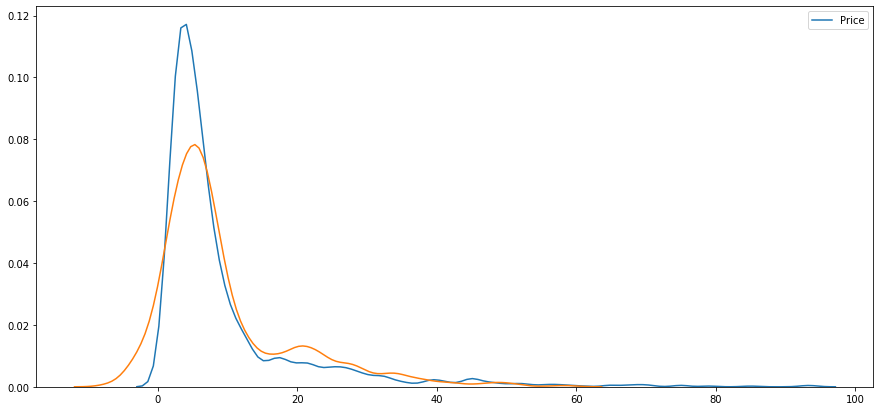

In [396]:
plt.figure(figsize=(15,7))
sns.kdeplot(y_test)
sns.kdeplot(y_pred_lin)
plt.show()

This is a pretty bad result.

### Random Forest Regressor

In [397]:
rfr = RandomForestRegressor(n_estimators = 100,random_state=0)
rfr.fit(X_train,y_train)

y_pred_rfr = rfr.predict(X_test)

print('R2_score: ',r2_score(y_test,y_pred_rfr))
print('RMSE: ',mean_squared_error(y_test,y_pred_rfr,squared=False))

R2_score:  0.9107568310322536
RMSE:  3.410218955761409


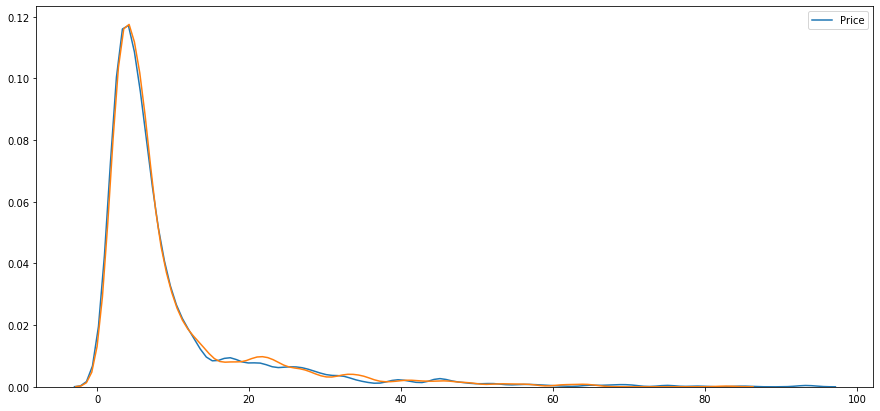

In [398]:
plt.figure(figsize=(15,7))
sns.kdeplot(y_test)
sns.kdeplot(y_pred_rfr)
plt.show()

### XGBOOST Regressor

#### Taking columns that have high correlation with price

In [399]:
pcorr = X_train.join(y_train).corr()
imp_corr_cols = pcorr[['Price']][pcorr['Price']>-0.25].iloc[:-1].index

X_train = X_train[imp_corr_cols]
X_test = X_test[imp_corr_cols]
X_train.head()

,Year,Kilometers_Driven,Engine,Power,Seats,Location_Fuel_Type,Location_Transmission,Location_Owner_Type,Location_Brand,Owner_Type_Brand,...,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Model_encoded,Type_encoded
245,2007,72000,1086.0,82.0,5.0,30,19,31,212,62,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.791967,1.738571
2175,2013,70961,1498.0,98.6,5.0,18,13,19,142,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.766282,3.978158
4134,2016,34004,1497.0,117.3,7.0,4,3,2,23,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.579124,9.060769
4975,2016,41810,1373.0,91.1,5.0,10,7,10,77,16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.626034,6.809325
2473,2018,68737,1248.0,88.5,5.0,9,7,10,77,16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.626034,6.349655


In [400]:
base_xgbr = XGBRegressor(objective='reg:squarederror', tree_method='hist')
base_xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='hist',
             validate_parameters=1, verbosity=None)

In [401]:
y_pred_xgbr = base_xgbr.predict(X_test)
print('RSME: ',mean_squared_error(y_test, y_pred_xgbr,squared = False))
print('R2_Score: ',r2_score(y_test, y_pred_xgbr))

RSME:  3.368353952717518
R2_Score:  0.9129345400719298


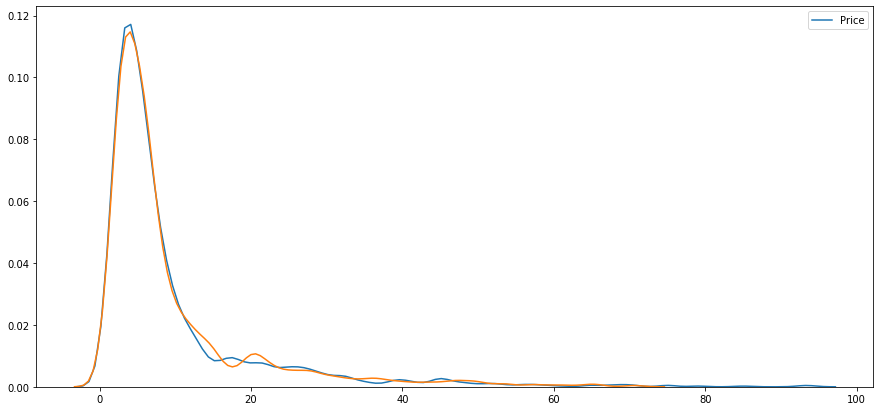

In [402]:
plt.figure(figsize=(15,7))
sns.kdeplot(y_test)
sns.kdeplot(y_pred_xgbr)
plt.show()

### Light GBM Regressor

#### Taking features with importance more than 0.005

In [403]:
feat_imp = pd.DataFrame(base_xgbr.feature_importances_, index=X_train.columns)
impfeat = pd.Series(base_xgbr.feature_importances_, index=X_train.columns)
impcols = impfeat[impfeat>0.005].index
impfeat.head()

Year                 0.051362
Kilometers_Driven    0.014636
Engine               0.016022
Power                0.358532
Seats                0.002059
dtype: float32

In [404]:
X_train = X_train[impcols]
X_test = X_test[impcols]
X_train.columns

Index(['Year', 'Kilometers_Driven', 'Engine', 'Power', 'Location_Fuel_Type',
       'Fuel_Type_Diesel', 'Transmission_Automatic', 'Location_Delhi',
       'Location_Hyderabad', 'Brand_BMW', 'Brand_Jaguar', 'Brand_Land',
       'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Porsche', 'Brand_Skoda',
       'Model_encoded', 'Type_encoded'],
      dtype='object')

In [405]:
lgbmr = LGBMRegressor()
lgbmr.fit(X_train, y_train)
y_pred_lgbmr = lgbmr.predict(X_test)

In [406]:
print('RMSE: ',mean_squared_error(y_test, y_pred_lgbmr, squared=False))
print('R2_score: ',r2_score(y_pred_lgbmr,y_test))

RMSE:  3.516835154023666
R2_score:  0.8924049997683601


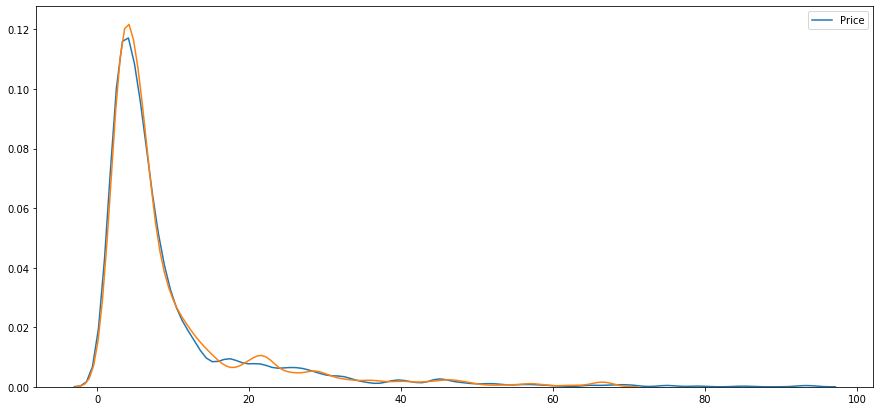

In [407]:
plt.figure(figsize=(15,7))
sns.kdeplot(y_test)
sns.kdeplot(y_pred_lgbmr)
plt.show()

#### Using GridSearchCV to improve Model

In [408]:
param_grid2 ={
    "learning_rate": [0.15],
    "max_depth": [5,6,7,8],
    "n_estimators": [1500,1600,1700,1800],
    "num_leaves": [25,27],
    'reg_alpha': [0,0.1,0.001],
    'reg_lambda': [0,0.03,0.01]
}
lgbm2 = GridSearchCV(estimator=lgbmr, param_grid=param_grid2, n_jobs=-1, verbose=5, cv=4)


In [409]:
lgbm2.fit(X_train, y_train)

Fitting 4 folds for each of 288 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  5.7min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.15], 'max_depth': [5, 6, 7, 8],
                         'n_estimators': [1500, 1600, 1700, 1800],
                         'num_leaves':

In [412]:
print(lgbm2.best_params_)
print(lgbm2.score(X_test,y_test))

{'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 1500, 'num_leaves': 25, 'reg_alpha': 0.001, 'reg_lambda': 0.01}
0.9239022264127634


In [413]:
tuned_lgbmr = LGBMRegressor(**lgbm2.best_params_)
tuned_lgbmr.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.15, max_depth=5,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1500, n_jobs=-1, num_leaves=25, objective=None,
              random_state=None, reg_alpha=0.001, reg_lambda=0.01, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [414]:
y_pred_lgbmr_2 = tuned_lgbmr.predict(X_test)
print('RMSE: ',mean_squared_error(y_test, y_pred_lgbmr_2,squared=False))
print('R2_Score: ',r2_score(y_test,y_pred_lgbmr_2))

RMSE:  3.1490586388746027
R2_Score:  0.9239022264127634


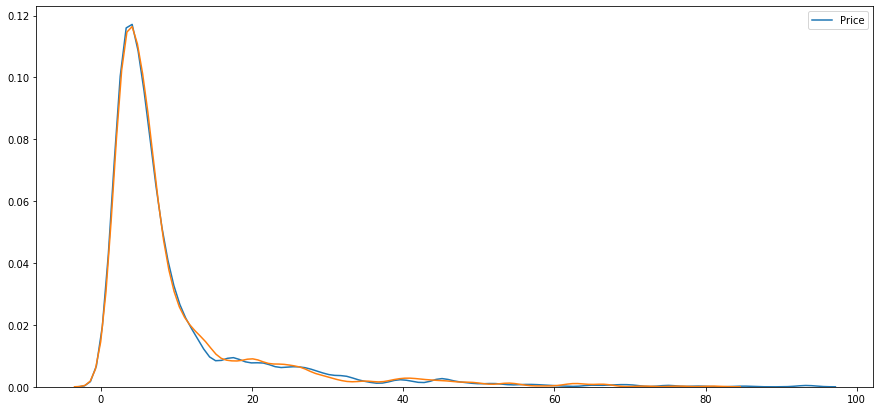

In [415]:
plt.figure(figsize=(15,7))
sns.kdeplot(y_test)
sns.kdeplot(y_pred_lgbmr_2)
plt.show()

#### Saving in csv file

In [416]:
X_train.to_csv('X_train_processed.csv',index = False,header=True)
X_test.to_csv('X_test_processed.csv',index = False,header=True)

# Predicting new values based on Best Model (tuned_lgbmr)

#### Reading unknown data and doing data preprocessing

In [417]:
data_test = pd.read_excel('Data_Test (1).xlsx')
data_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [418]:
data_test.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats'],
      dtype='object')

In [419]:
data_test.describe()

,Year,Kilometers_Driven,Seats
count,1234.000000,1234.000000,1223.000000
mean,2013.400324,58507.288493,5.284546
std,3.179700,35598.702098,0.825622
min,1996.000000,1000.000000,2.000000
25%,2011.000000,34000.000000,5.000000
50%,2014.000000,54572.500000,5.000000
75%,2016.000000,75000.000000,5.000000
max,2019.000000,350000.000000,10.000000


In [420]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   object 
 8   Engine             1224 non-null   object 
 9   Power              1224 non-null   object 
 10  Seats              1223 non-null   float64
dtypes: float64(1), int64(2), object(8)
memory usage: 106.2+ KB


In [421]:
data_test.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
dtype: object

In [422]:
data_test.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

In [423]:
data_test['Mileage'] = data_test['Mileage'].apply(lambda x: re.sub('[$kmpl|km/kg]','',str(x)))
data_test['Engine'] = data_test['Engine'].apply(lambda x: re.sub('[$CC]','',str(x)))
data_test['Power'] = data_test['Power'].apply(lambda x: re.sub('[$bhp]','',str(x)))

data_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998,58.2,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7,796,47.3,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.8,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364,null,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5,1197,82.85,5.0


In [424]:
data_test['Mileage'] = pd.to_numeric(data_test['Mileage'],errors='coerce')
data_test['Engine'] = pd.to_numeric(data_test['Engine'],errors='coerce')
data_test['Power'] = pd.to_numeric(data_test['Power'],errors='coerce')
data_test.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
dtype: object

In [425]:
data_test.loc[data_test['Mileage']==0,'Mileage']=np.nan

In [426]:
data_test.loc[data_test.Power == 'null','Power'] = np.NaN

/home/percy/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [427]:
data_test.loc[data_test.Seats == 0,'Seats'] = np.NaN

In [428]:
data_test.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage              13
Engine               10
Power                32
Seats                11
dtype: int64

In [429]:
data_test['Name'] = data_test['Name'].apply(lambda x: re.sub('Rover','',str(x)))

In [430]:
NameSplit = data_test.Name.str.split(expand=True)[[0,1,2]]
NameSplit.rename(columns={0:'Brand',1:'Model',2:'Type'}, inplace=True)
data_test = data_test.join(NameSplit)
data_test = data_test.drop("Name", axis=1)
data_test.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Type
0,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0,Maruti,Alto,K10
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0,Maruti,Alto,800
2,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0,Toyota,Innova,Crysta
3,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,Toyota,Etios,Liva
4,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0,Hyundai,i20,Magna


In [431]:
object_cols = data_test.select_dtypes("object").columns

low_cardinality_cols = [col for col in object_cols if data_test[col].nunique() < 15]
low_cardinality_cols.append("Brand")
low_cardinality_cols

['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand']

In [432]:
interactions = pd.DataFrame(index=data_test.index)

for features in combinations(low_cardinality_cols,2):
    
    new_interaction = data_test[features[0]].map(str)+"_"+data_test[features[1]].map(str)
    
    encoder = LabelEncoder()
    interactions["_".join(features)] = encoder.fit_transform(new_interaction)



data_test = data_test.join(interactions) #append to the data_testset
data_test.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,...,Location_Fuel_Type,Location_Transmission,Location_Owner_Type,Location_Brand,Fuel_Type_Transmission,Fuel_Type_Owner_Type,Fuel_Type_Brand,Transmission_Owner_Type,Transmission_Brand,Owner_Type_Brand
0,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0,...,9,9,14,78,0,0,1,3,35,14
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0,...,8,7,12,60,5,8,42,5,35,39
2,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0,...,24,19,26,180,2,1,25,3,44,22
3,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,...,12,11,17,105,2,1,25,3,44,22
4,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0,...,25,19,26,168,5,6,38,3,30,7


In [433]:
data_test.isnull().sum()

Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                    13
Engine                     10
Power                      32
Seats                      11
Brand                       0
Model                       0
Type                        1
Location_Fuel_Type          0
Location_Transmission       0
Location_Owner_Type         0
Location_Brand              0
Fuel_Type_Transmission      0
Fuel_Type_Owner_Type        0
Fuel_Type_Brand             0
Transmission_Owner_Type     0
Transmission_Brand          0
Owner_Type_Brand            0
dtype: int64

In [434]:
number_cols = data_test.select_dtypes("number")
null_number_cols = number_cols.columns[number_cols.isnull().any()]

for cols in null_number_cols:
    data_test.loc[:,cols] = data_test.loc[:,cols].fillna(data_test.groupby('Brand')[cols].transform('median'))
    data_test.loc[:,cols] = data_test.loc[:,cols].fillna(data_test[cols].median())
data_test.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,...,Location_Fuel_Type,Location_Transmission,Location_Owner_Type,Location_Brand,Fuel_Type_Transmission,Fuel_Type_Owner_Type,Fuel_Type_Brand,Transmission_Owner_Type,Transmission_Brand,Owner_Type_Brand
0,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0,...,9,9,14,78,0,0,1,3,35,14
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0,...,8,7,12,60,5,8,42,5,35,39
2,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0,...,24,19,26,180,2,1,25,3,44,22
3,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,102.00,5.0,...,12,11,17,105,2,1,25,3,44,22
4,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0,...,25,19,26,168,5,6,38,3,30,7


In [435]:
data_test.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,...,Location_Fuel_Type,Location_Transmission,Location_Owner_Type,Location_Brand,Fuel_Type_Transmission,Fuel_Type_Owner_Type,Fuel_Type_Brand,Transmission_Owner_Type,Transmission_Brand,Owner_Type_Brand
0,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0,...,9,9,14,78,0,0,1,3,35,14
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0,...,8,7,12,60,5,8,42,5,35,39
2,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0,...,24,19,26,180,2,1,25,3,44,22
3,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,102.00,5.0,...,12,11,17,105,2,1,25,3,44,22
4,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0,...,25,19,26,168,5,6,38,3,30,7


In [436]:
data_test.isnull().sum()

Location                   0
Year                       0
Kilometers_Driven          0
Fuel_Type                  0
Transmission               0
Owner_Type                 0
Mileage                    0
Engine                     0
Power                      0
Seats                      0
Brand                      0
Model                      0
Type                       1
Location_Fuel_Type         0
Location_Transmission      0
Location_Owner_Type        0
Location_Brand             0
Fuel_Type_Transmission     0
Fuel_Type_Owner_Type       0
Fuel_Type_Brand            0
Transmission_Owner_Type    0
Transmission_Brand         0
Owner_Type_Brand           0
dtype: int64

#### LightGbm Regressor will take care of null value of Type during running as it has inbuilt feature to do so

In [437]:
data.select_dtypes("object").nunique()

Location         11
Fuel_Type         5
Transmission      2
Owner_Type        4
Brand            31
Model           214
Type            344
dtype: int64

#### One Hot Encoding Low cardinality columns

In [438]:
OHE_cat_features = ["Fuel_Type","Transmission", "Location", "Owner_Type", "Brand"]
OH_encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')

In [439]:
OH_cols = pd.DataFrame(OH_encoder.fit_transform(data_test[OHE_cat_features]))

In [440]:
OH_cols.index = data_test.index

In [441]:
OH_cols.columns = OH_encoder.get_feature_names(OHE_cat_features)
data_test = data_test.join(OH_cols)
data_test.drop(OHE_cat_features, axis=1, inplace = True)
data_test.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Model,Type,Location_Fuel_Type,Location_Transmission,...,Brand_Mitsubishi,Brand_Nissan,Brand_OpelCorsa,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2014,40929,32.26,998.0,58.20,4.0,Alto,K10,9,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013,54493,24.70,796.0,47.30,5.0,Alto,800,8,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017,34000,13.68,2393.0,147.80,7.0,Innova,Crysta,24,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2012,139000,23.59,1364.0,102.00,5.0,Etios,Liva,12,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2014,29000,18.50,1197.0,82.85,5.0,i20,Magna,25,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Target encoding remaining columns

In [442]:
data_test = data_test.join(target.transform(data_test[target_cat_features]).add_suffix('_encoded'))

In [443]:
object_cols = data_test.select_dtypes('object')
data_test.drop(object_cols, axis=1, inplace = True)
data_test.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Fuel_Type,Location_Transmission,Location_Owner_Type,Location_Brand,...,Brand_OpelCorsa,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Model_encoded,Type_encoded
0,2014,40929,32.26,998.0,58.20,4.0,9,9,14,78,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.509478,2.969688
1,2013,54493,24.70,796.0,47.30,5.0,8,7,12,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.509478,2.822667
2,2017,34000,13.68,2393.0,147.80,7.0,24,19,26,180,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.917273,18.442286
3,2012,139000,23.59,1364.0,102.00,5.0,12,11,17,105,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.308049,3.822942
4,2014,29000,18.50,1197.0,82.85,5.0,25,19,26,168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.116591,3.440000


In [444]:
data_test = data_test[X_train.columns]
data_test.head()

,Year,Kilometers_Driven,Engine,Power,Location_Fuel_Type,Fuel_Type_Diesel,Transmission_Automatic,Location_Delhi,Location_Hyderabad,Brand_BMW,Brand_Jaguar,Brand_Land,Brand_Maruti,Brand_Mercedes-Benz,Brand_Porsche,Brand_Skoda,Model_encoded,Type_encoded
0,2014,40929,998.0,58.20,9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.509478,2.969688
1,2013,54493,796.0,47.30,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.509478,2.822667
2,2017,34000,2393.0,147.80,24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.917273,18.442286
3,2012,139000,1364.0,102.00,12,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.308049,3.822942
4,2014,29000,1197.0,82.85,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.116591,3.440000


#### Predicting Prices

In [445]:
predicted_prices = tuned_lgbmr.predict(data_test)
predicted_prices

array([ 3.45496208,  2.04324927, 15.4424894 , ...,  3.70496247,
        4.58531194, 22.44958274])

#### Saving to csv file

In [446]:
data_test['Predicted_Prices'] = predicted_prices
data_test.head()

,Year,Kilometers_Driven,Engine,Power,Location_Fuel_Type,Fuel_Type_Diesel,Transmission_Automatic,Location_Delhi,Location_Hyderabad,Brand_BMW,Brand_Jaguar,Brand_Land,Brand_Maruti,Brand_Mercedes-Benz,Brand_Porsche,Brand_Skoda,Model_encoded,Type_encoded,Predicted_Prices
0,2014,40929,998.0,58.20,9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.509478,2.969688,3.454962
1,2013,54493,796.0,47.30,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.509478,2.822667,2.043249
2,2017,34000,2393.0,147.80,24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.917273,18.442286,15.442489
3,2012,139000,1364.0,102.00,12,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.308049,3.822942,3.695737
4,2014,29000,1197.0,82.85,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.116591,3.440000,4.043054


In [447]:
data_test.to_csv('Data_Test_Predictions.csv',index=False,header=True)

In [448]:
data_test_mod = pd.read_excel('Data_Test (1).xlsx')
data_test_mod['Predicted_Prices'] = predicted_prices
data_test_mod.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Predicted_Prices
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,3.454962
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,2.043249
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,15.442489
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,3.695737
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,4.043054


In [449]:
data_test_mod.to_csv('Data_Test_With_Prediction.csv',index=False,header=True)

## By Adwait Agashe

# END